In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_excel(r"ZCHURNDATA.xlsx")

In [3]:
data.shape

(1249, 28)

In [4]:
data['CUS_DOB'] = pd.to_datetime(data['CUS_DOB'])


In [5]:
del data['CIF']

In [6]:
data.tail(10).T

,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248
CUS_DOB,1963-05-21 00:00:00,1985-01-24 00:00:00,1974-07-30 00:00:00,1981-01-15 00:00:00,1981-08-24 00:00:00,1951-09-10 00:00:00,1984-03-23 00:00:00,1985-02-04 00:00:00,1950-02-03 00:00:00,1961-02-23 00:00:00
AGE,56,34,45,38,38,68,35,34,69,58
CUS_Month_Income,5000000.0,500000.0,9000.0,4600000.0,1500000.0,4500.0,3500000.0,1000.0,2000000.0,5000000.0
CUS_Gender,MALE,MALE,FEMALE,FEMALE,FEMALE,MALE,MALE,MALE,MALE,FEMALE
CUS_Marital_Status,MARRIED,MARRIED,DIVORCE,SINGLE,SINGLE,SINGLE,SINGLE,SINGLE,SINGLE,SINGLE
CUS_Customer_Since,2005-07-21 00:00:00,2005-07-22 00:00:00,2005-07-22 00:00:00,2005-07-22 00:00:00,2005-07-22 00:00:00,2005-07-25 00:00:00,2005-07-27 00:00:00,2005-07-25 00:00:00,2005-07-26 00:00:00,2005-07-26 00:00:00
YEARS_WITH_US,14,14,14,14,14,14,14,14,14,14
# total debit transactions for S1,6,6,58,152,125,13,55,415,147,76
# total debit transactions for S2,6,13,55,160,106,12,35,368,202,88
# total debit transactions for S3,6,21,84,184,64,1,37,424,234,69


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CUS_DOB                             1249 non-null   datetime64[ns]
 1   AGE                                 1249 non-null   int64         
 2   CUS_Month_Income                    1238 non-null   float64       
 3   CUS_Gender                          1247 non-null   object        
 4   CUS_Marital_Status                  1249 non-null   object        
 5   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 6   YEARS_WITH_US                       1249 non-null   int64         
 7   # total debit transactions for S1   1249 non-null   int64         
 8   # total debit transactions for S2   1249 non-null   int64         
 9   # total debit transactions for S3   1249 non-null   int64         
 10  total debit amount for S

In [8]:
data['CUS_DOB'] = data['CUS_DOB'].dt.year



In [9]:
data['CUS_Customer_Since'] = data['CUS_Customer_Since'].dt.year

In [10]:
data.describe()

,CUS_DOB,AGE,CUS_Month_Income,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
count,1249.000000,1249.000000,1.238000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,...,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000
mean,1972.253002,46.746998,2.764869e+06,2004.883106,14.116894,54.262610,55.680544,56.966373,3.147439e+05,3.090418e+05,...,8.675741,3.089540e+05,3.173819e+05,3.020052e+05,9.299314e+05,166.909528,9.283411e+05,24.559648,191.469175,2222.296237
std,12.315109,12.315109,5.406761e+06,2.279882,2.279882,80.732325,81.020146,84.649516,1.513433e+06,1.293928e+06,...,14.087572,1.631418e+06,1.048443e+06,1.273680e+06,3.142967e+06,235.386076,3.685585e+06,38.467079,263.353988,3.314255
min,1900.000000,14.000000,0.000000e+00,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000
25%,1964.000000,39.000000,7.568750e+03,2005.000000,14.000000,7.000000,6.000000,6.000000,1.155000e+04,1.122578e+04,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.642350e+04,26.000000,1.511744e+04,2.000000,33.000000,2222.000000
50%,1973.000000,46.000000,1.500000e+06,2005.000000,14.000000,22.000000,24.000000,24.000000,5.395632e+04,6.158130e+04,...,6.000000,4.522084e+04,4.679082e+04,4.952000e+04,2.031400e+05,74.000000,1.525319e+05,18.000000,90.000000,2223.000000
75%,1980.000000,55.000000,3.000000e+06,2005.000000,14.000000,65.000000,65.000000,68.000000,1.892775e+05,2.096500e+05,...,10.000000,1.720000e+05,1.872971e+05,1.950319e+05,6.613808e+05,196.000000,5.853255e+05,28.000000,227.000000,2223.000000
max,2005.000000,119.000000,8.000000e+07,2019.000000,28.000000,715.000000,547.000000,757.000000,3.573349e+07,3.723382e+07,...,169.000000,4.920688e+07,1.753799e+07,3.764708e+07,6.997262e+07,1859.000000,1.043919e+08,429.000000,2174.000000,2236.000000


In [11]:
data.isnull().sum()

CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactions                     0
CUS_Target      

In [12]:
data['CUS_Gender']= data['CUS_Gender'].fillna("MALE")
data['CUS_Month_Income'].fillna(data['CUS_Month_Income'].median(),inplace=True)

[]

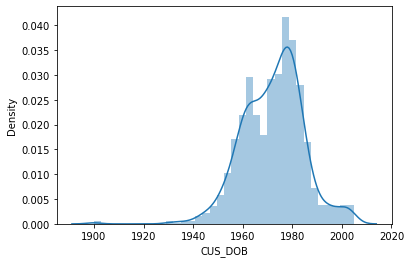

In [13]:
original = sns.distplot(data['CUS_DOB'])
original.plot()

<AxesSubplot:xlabel='CUS_Month_Income'>

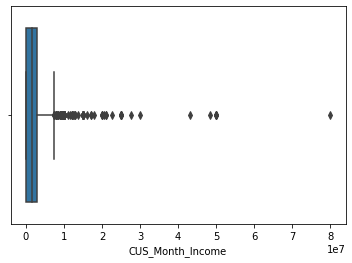

In [14]:
sns.boxplot(data['CUS_Month_Income'])

In [15]:
data['CUS_DOB'].skew()

-0.3432138512054183

In [16]:
# skewness_log = np.log(data['CUS_Month_Income'])

# skewness_log.skew()

In [17]:
# skew1 = sns.distplot(skewness_log)
# skew1.plot()

In [18]:
skew_sqrt = np.sqrt(data['CUS_Month_Income'])
skew_sqrt.skew()

1.5258467496358188

[]

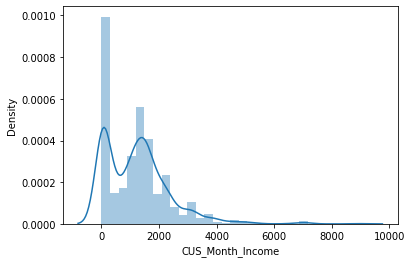

In [19]:
skew2 = sns.distplot(skew_sqrt)
skew2.plot()

# handling skewness


In [20]:
cat = data.dtypes[data.dtypes != 'object'].index

In [21]:
skew_feat = data[cat].skew().sort_values(ascending=False)

In [22]:
skewness = pd.DataFrame({'skew':skew_feat})

In [23]:
skewness

,skew
total credit amount for S1,22.980122
total credit amount for S3,21.175667
total debit amount for S2,20.187508
total credit amount,19.095959
total debit amount for S1,16.296164
total debit amount,12.574292
total debit amount for S3,9.573946
total credit amount for S2,8.947780
CUS_Month_Income,6.342003
# total credit transactions for S1,6.144899


In [24]:
skewed_features = data[skewness.index]

In [25]:
skewed_features.columns

Index(['total credit amount for S1', 'total credit amount for S3',
       'total debit amount for S2', 'total credit amount',
       'total debit amount for S1', 'total debit amount',
       'total debit amount for S3', 'total credit amount for S2',
       'CUS_Month_Income', '# total credit transactions for S1',
       'total credit transactions', '# total credit transactions for S3',
       '# total credit transactions for S2',
       '# total debit transactions for S1',
       '# total debit transactions for S3', 'total transactions',
       'total debit transactions', '# total debit transactions for S2',
       'YEARS_WITH_US', 'AGE', 'CUS_DOB', 'CUS_Target', 'CUS_Customer_Since'],
      dtype='object')

In [26]:
##cube rt transformation +ve skew
for i in skewed_features[:-1]:
    data[i] = data[i]**(1/3) 
    

In [27]:
data.skew()

CUS_DOB                              -0.366599
AGE                                  -0.535882
CUS_Month_Income                      0.447012
CUS_Customer_Since                   -1.428156
YEARS_WITH_US                        -4.952400
# total debit transactions for S1     0.340211
# total debit transactions for S2     0.222557
# total debit transactions for S3     0.201903
total debit amount for S1             2.025088
total debit amount for S2             1.557775
total debit amount for S3             1.307329
# total credit transactions for S1    0.044715
# total credit transactions for S2    0.048543
# total credit transactions for S3    0.059512
total credit amount for S1            1.672035
total credit amount for S2            1.345104
total credit amount for S3            1.349011
total debit amount                    1.721168
total debit transactions              0.554672
total credit amount                   1.454028
total credit transactions             0.028287
total transac

<AxesSubplot:xlabel='YEARS_WITH_US'>

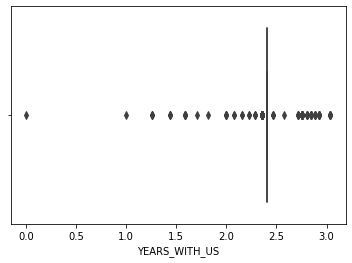

In [28]:
sns.boxplot(data['YEARS_WITH_US'])

In [29]:
# sns.pairplot(data=data)

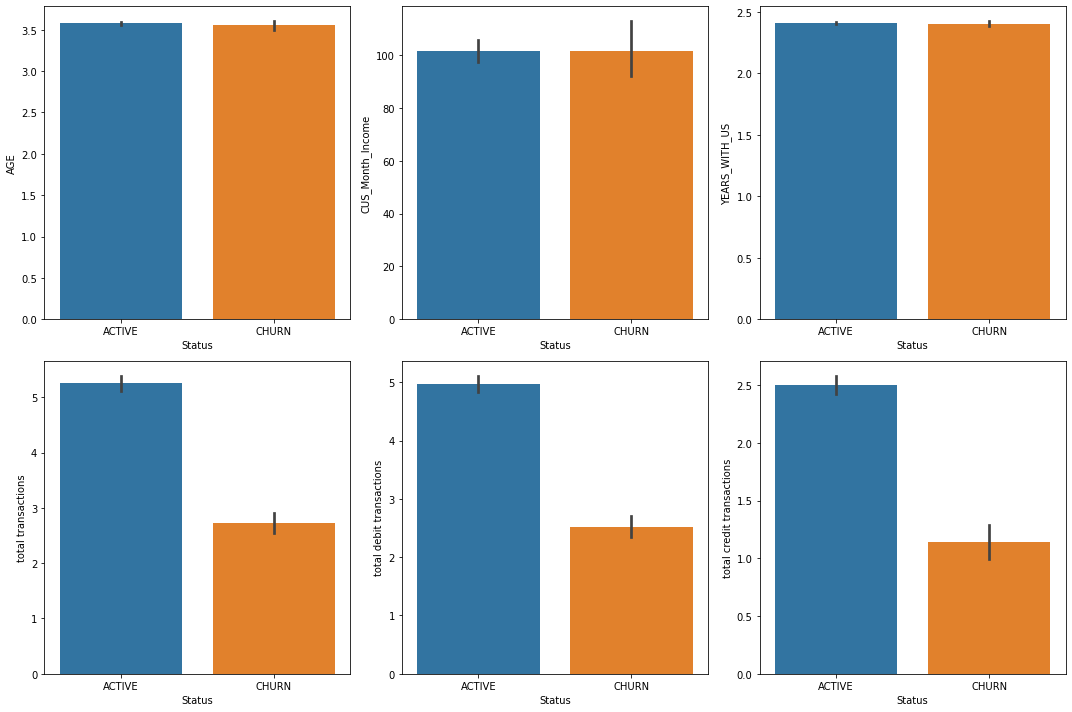

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(y=data['AGE'],x=data['Status'])
plt.subplot(2,3,2)
sns.barplot(y=data['CUS_Month_Income'],x=data['Status'])
plt.subplot(2,3,3)
sns.barplot(y=data['YEARS_WITH_US'],x=data['Status'])
plt.subplot(2,3,4)
sns.barplot(y=data['total transactions'],x=data['Status'])
plt.subplot(2,3,5)
sns.barplot(y=data['total debit transactions'],x=data['Status'])
plt.subplot(2,3,6)
sns.barplot(y=data['total credit transactions'],x=data['Status'])
plt.tight_layout()

In [31]:
cat1 = data.dtypes[data.dtypes == 'object'].index
cat1 = cat1[:-1]
cat1

Index(['CUS_Gender', 'CUS_Marital_Status', 'TAR_Desc'], dtype='object')

In [32]:
df = data.copy()

In [33]:
# sns.pairplot(data=df)

In [34]:
df.head()

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,12.535897,3.659306,19.234977,MALE,MARRIED,12.586599,2.924018,6.518684,6.423158,7.013579,...,120.829430,133.487323,168.196761,9.608182,178.209127,4.020726,9.837369,13.066718,EXECUTIVE,ACTIVE
1,12.542257,3.583048,114.471424,FEMALE,SINGLE,12.609701,2.410142,3.332222,2.466212,3.556893,...,26.916063,38.597213,51.846096,4.594701,44.310476,2.154435,4.747459,13.051081,LOW,ACTIVE
2,12.527407,3.756286,170.997595,FEMALE,SINGLE,12.609701,2.410142,3.141381,2.410142,2.000000,...,62.171554,41.397844,33.434553,3.756286,100.691333,3.000000,4.308869,13.049124,MIDLE,ACTIVE
3,12.607604,2.466212,7.937005,FEMALE,SINGLE,12.609701,2.410142,0.000000,1.000000,0.000000,...,30.398386,26.568315,15.874011,1.000000,42.533438,2.289428,2.351335,13.051081,LOW,ACTIVE
4,12.538018,3.634241,208.008382,FEMALE,SINGLE,12.628540,1.709976,2.466212,3.207534,2.289428,...,56.040787,41.310746,69.690490,3.914868,76.179860,2.758924,4.326749,13.051081,LOW,ACTIVE


<AxesSubplot:xlabel='CUS_Month_Income'>

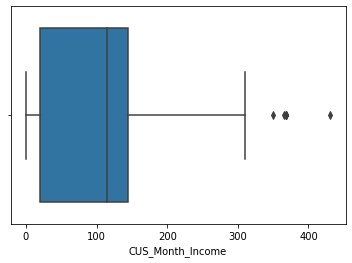

In [35]:
sns.boxplot(df['CUS_Month_Income'])

In [36]:
df['CUS_Month_Income'].skew()

0.4470119464703883

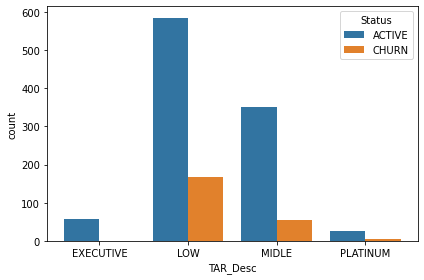

In [37]:
# plt.figure(figsize=(15,10))

plt3 = sns.countplot(x=df['TAR_Desc'],hue=df['Status'])

plt.plot()
plt.tight_layout()


<AxesSubplot:xlabel='CUS_Gender', ylabel='count'>

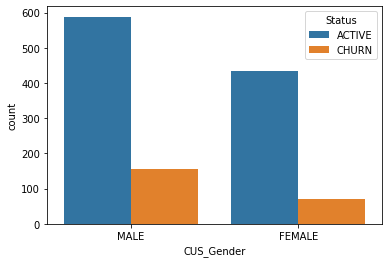

In [38]:

sns.countplot(x=df['CUS_Gender'],hue=df['Status'])

<AxesSubplot:xlabel='CUS_Marital_Status', ylabel='count'>

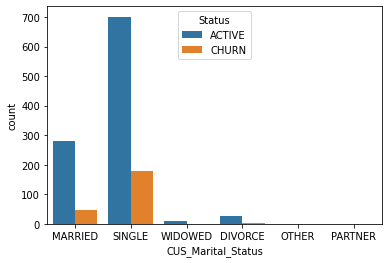

In [39]:
# plt2 = sns.barplot(x=df['CUS_Marital_Status'],y=df['Status'])
sns.countplot(x=df['CUS_Marital_Status'],hue=df['Status'])

<AxesSubplot:xlabel='CUS_Marital_Status', ylabel='count'>

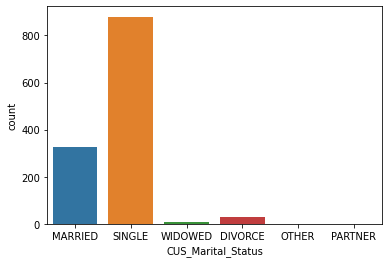

In [40]:
sns.countplot(data['CUS_Marital_Status'])

<AxesSubplot:xlabel='Status', ylabel='count'>

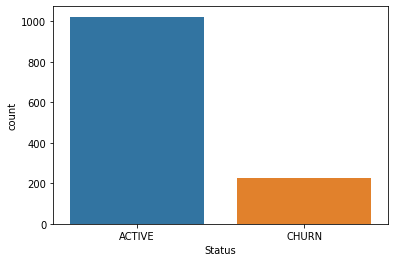

In [41]:
sns.countplot(data['Status'])
# 5:1 Ratio

In [42]:
data['Status'].value_counts()

ACTIVE    1022
CHURN      227
Name: Status, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
##binary variable
bi_var = [col for col in df.columns if len(df[col].unique()) ==2 ]
cat_col = [col for col in df.select_dtypes(['object']).columns.tolist() if col not in bi_var]

encoder = LabelEncoder()
for i in bi_var:
    df[i] = encoder.fit_transform(df[i]) 
    
df = pd.get_dummies(df,columns= cat_col)


In [44]:
# df = df.drop(['CUS_DOB','CUS_Customer_Since'],axis=1)


In [45]:
df.head()

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,...,CUS_Marital_Status_DIVORCE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED,TAR_Desc_EXECUTIVE,TAR_Desc_LOW,TAR_Desc_MIDLE,TAR_Desc_PLATINUM
0,12.535897,3.659306,19.234977,1,12.586599,2.924018,6.518684,6.423158,7.013579,113.422094,...,0,1,0,0,0,0,1,0,0,0
1,12.542257,3.583048,114.471424,0,12.609701,2.410142,3.332222,2.466212,3.556893,32.826314,...,0,0,0,0,1,0,0,1,0,0
2,12.527407,3.756286,170.997595,0,12.609701,2.410142,3.141381,2.410142,2.000000,30.455583,...,0,0,0,0,1,0,0,0,1,0
3,12.607604,2.466212,7.937005,0,12.609701,2.410142,0.000000,1.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
4,12.538018,3.634241,208.008382,0,12.628540,1.709976,2.466212,3.207534,2.289428,41.032174,...,0,0,0,0,1,0,0,1,0,0


In [46]:
X = df.drop('Status',axis=1)
y = df['Status']

In [47]:
X.head()

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,...,CUS_Marital_Status_DIVORCE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED,TAR_Desc_EXECUTIVE,TAR_Desc_LOW,TAR_Desc_MIDLE,TAR_Desc_PLATINUM
0,12.535897,3.659306,19.234977,1,12.586599,2.924018,6.518684,6.423158,7.013579,113.422094,...,0,1,0,0,0,0,1,0,0,0
1,12.542257,3.583048,114.471424,0,12.609701,2.410142,3.332222,2.466212,3.556893,32.826314,...,0,0,0,0,1,0,0,1,0,0
2,12.527407,3.756286,170.997595,0,12.609701,2.410142,3.141381,2.410142,2.000000,30.455583,...,0,0,0,0,1,0,0,0,1,0
3,12.607604,2.466212,7.937005,0,12.609701,2.410142,0.000000,1.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
4,12.538018,3.634241,208.008382,0,12.628540,1.709976,2.466212,3.207534,2.289428,41.032174,...,0,0,0,0,1,0,0,1,0,0


In [48]:
from sklearn.feature_selection import SelectKBest,chi2,RFE,SelectFromModel,mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(999, 34)
(999,)
(250, 34)
(250,)


In [51]:
features = mutual_info_classif(X_train, y_train)
features

array([0.00789679, 0.        , 0.        , 0.00319353, 0.        ,
       0.0245634 , 0.06259165, 0.08652209, 0.15276385, 0.0585975 ,
       0.06410446, 0.12668404, 0.05065777, 0.07928366, 0.10339861,
       0.05772415, 0.08466128, 0.1194984 , 0.09943061, 0.12067799,
       0.07272556, 0.09934919, 0.11332041, 0.        , 0.01185286,
       0.00788131, 0.        , 0.00755775, 0.01875593, 0.00571973,
       0.        , 0.02419363, 0.00997213, 0.        ])

In [52]:
features = pd.Series(features)
features.index = X_train.columns
features.sort_values(ascending=False)

# total debit transactions for S3     0.152764
total debit amount for S3             0.126684
total debit transactions              0.120678
total credit amount for S3            0.119498
total transactions                    0.113320
# total credit transactions for S3    0.103399
total debit amount                    0.099431
total credit transactions             0.099349
# total debit transactions for S2     0.086522
total credit amount for S2            0.084661
# total credit transactions for S2    0.079284
total credit amount                   0.072726
total debit amount for S2             0.064104
# total debit transactions for S1     0.062592
total debit amount for S1             0.058598
total credit amount for S1            0.057724
# total credit transactions for S1    0.050658
YEARS_WITH_US                         0.024563
TAR_Desc_LOW                          0.024194
CUS_Marital_Status_SINGLE             0.018756
CUS_Marital_Status_DIVORCE            0.011853
TAR_Desc_MIDL

<AxesSubplot:>

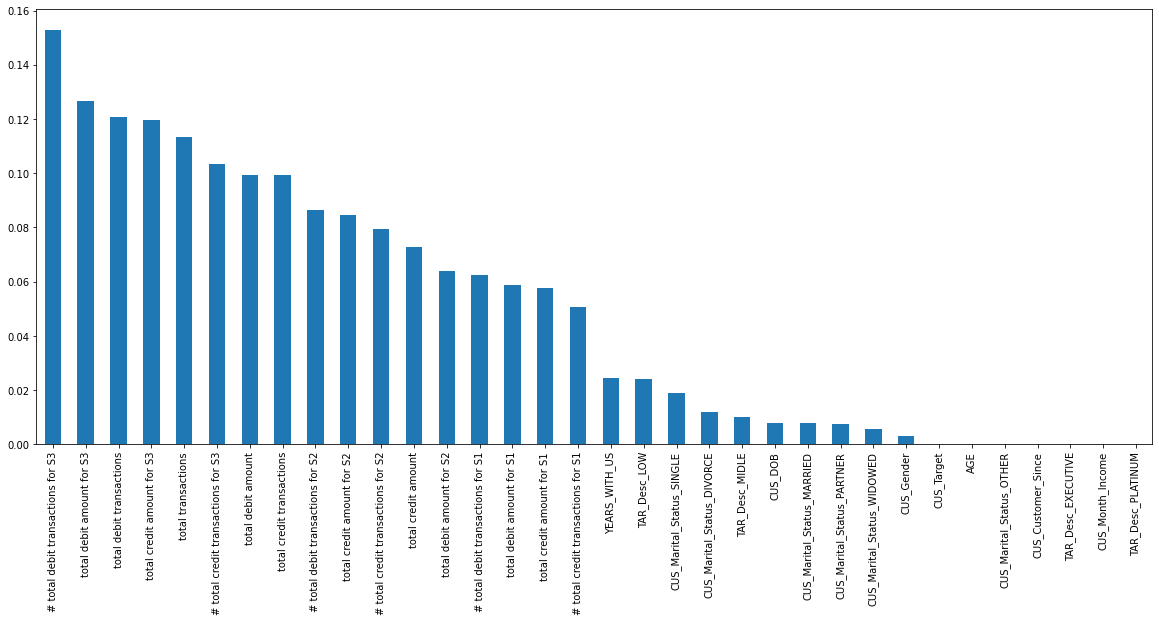

In [53]:

features.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [54]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
fea_col = X_train.columns[sel_five_cols.get_support()]
fea_col

Index(['# total debit transactions for S3', 'total debit amount for S3',
       'total credit amount for S3', 'total debit transactions',
       'total transactions'],
      dtype='object')

In [55]:
X_new = X[fea_col]
X_new.head()

,# total debit transactions for S3,total debit amount for S3,total credit amount for S3,total debit transactions,total transactions
0,7.013579,127.417312,133.487323,9.608182,9.837369
1,3.556893,43.770268,38.597213,4.594701,4.747459
2,2.000000,16.322805,41.397844,3.756286,4.308869
3,0.000000,0.000000,26.568315,1.000000,2.351335
4,2.289428,35.928717,41.310746,3.914868,4.326749


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=123)

In [57]:
from sklearn.preprocessing import StandardScaler   ### scaling for SVM
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [58]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

rus = RandomOverSampler(0.75)
X_train_ns,y_train_ns=rus.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))


The number of classes before fit Counter({0: 828, 1: 171})
The number of classes after fit Counter({0: 828, 1: 621})


In [59]:
rf = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()

In [60]:
model = []
cross_val = []
recall = []
for i in (rf,svc,xgb):
    model.append(i.__class__.__name__)
    cross_val.append(cross_validate(i,X_train_ns,y_train_ns,scoring='recall'))
    

[21:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [61]:
for d in range(len(cross_val)):
    recall.append(cross_val[d]['test_score'].mean())

In [62]:
model_recall = pd.DataFrame(data = recall,index=model,columns=['Recall'])
model_recall

,Recall
RandomForestClassifier,0.995174
SVC,0.760090
XGBClassifier,0.993574


In [68]:
#random Forest
n_estimators= range(0,1000,25)
criterion=['gini','entropy']
# max_depth=[100,200,300,400,500]
# min_samples_split=[2,4,6,8,10]
# min_samples_leaf=[1,3,5,7,9]
# max_features=[ 'auto','sqrt','log2']
grid = { 'criterion':criterion,
             'n_estimators':n_estimators     
              }
cv = KFold(n_splits=5, shuffle=False, random_state=None)
grid_search = GridSearchCV(rf,param_grid=grid,scoring='recall',cv = cv,n_jobs=-1)
grid_result = grid_search.fit(X_train_ns, y_train_ns)
print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')
                

Best result: 0.9783679417122041 for {'criterion': 'gini', 'n_estimators': 50}


In [72]:
best1 = pd.Series(grid_result.best_params_)
best1

max_features         auto
min_samples_leaf        1
min_samples_split       2
dtype: object

In [69]:
rf = RandomForestClassifier(n_estimators=50,criterion='gini')
min_samples_split=[2,4,6,8,10]
min_samples_leaf=[1,3,5,7,9,50]
max_features=[ 'auto','sqrt','log2']
grid = {  'min_samples_split':min_samples_split,  'min_samples_leaf':min_samples_leaf, 'max_features':max_features 
              }
cv = KFold(n_splits=5, shuffle=False, random_state=None)
grid_search = GridSearchCV(rf,param_grid=grid,scoring='recall',cv = cv,n_jobs=-1)
grid_result = grid_search.fit(X_train_ns, y_train_ns)
print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')


Best result: 0.9783679417122041 for {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [71]:
best = pd.Series(grid_result.best_params_)
best

max_features         auto
min_samples_leaf        1
min_samples_split       2
dtype: object

In [73]:
rf = RandomForestClassifier(n_estimators=50,criterion='gini',max_features='auto',min_samples_leaf=1,min_samples_split=2)
rf.fit(X_train_ns, y_train_ns)
X_test_rf = scaler.transform(X_test)
y_pred_rf = rf.predict(X_test_rf)
print(confusion_matrix(y_test,y_pred_rf))
print()
print(classification_report(y_test,y_pred_rf))


[[177  17]
 [ 26  30]]

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       194
           1       0.64      0.54      0.58        56

    accuracy                           0.83       250
   macro avg       0.76      0.72      0.74       250
weighted avg       0.82      0.83      0.82       250



In [70]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search = GridSearchCV(svc, param_grid, scoring='recall',cv=5)
grid_result = grid_search.fit(X_train_ns, y_train_ns)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.8825032258064516 for {'C': 0.01, 'kernel': 'sigmoid'}


In [71]:
X_test_svm = scaler.transform(X_test)
predictions = grid_search.predict(X_test_svm)
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))


[[129  65]
 [  4  52]]

              precision    recall  f1-score   support

           0       0.97      0.66      0.79       194
           1       0.44      0.93      0.60        56

    accuracy                           0.72       250
   macro avg       0.71      0.80      0.70       250
weighted avg       0.85      0.72      0.75       250



In [ ]:
sv = pd.Series(grid_result.best_params_)
sv

In [63]:
svc = SVC(C=0.01,kernel='sigmoid')
svc.fit(X_train_ns, y_train_ns)
X_test_svc = scaler.transform(X_test)
y_pred_svc = svc.predict(X_test_svc)
print(confusion_matrix(y_test,y_pred_svc))
print()
print(classification_report(y_test,y_pred_svc))


[[129  65]
 [  4  52]]

              precision    recall  f1-score   support

           0       0.97      0.66      0.79       194
           1       0.44      0.93      0.60        56

    accuracy                           0.72       250
   macro avg       0.71      0.80      0.70       250
weighted avg       0.85      0.72      0.75       250



In [63]:
##XGboost
grid = {'n_estimators': range(0,1000,25)}
grid_search = GridSearchCV(xgb, grid, scoring='recall',cv=5,n_jobs=-1)
grid_result = grid_search.fit(X_train_ns, y_train_ns)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[23:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best result: 0.9872 for {'n_estimators': 150}


In [64]:
xgb1 = pd.Series(grid_result.best_params_)
xgb1

n_estimators    150
dtype: int64

In [63]:
xgb = XGBClassifier(n_estimators=100)
param_grid = {'max_depth': range(1,8,1),
              'min_child_weight': np.arange(0.0001, 0.5, 0.001)}
grid_search = GridSearchCV(xgb, param_grid, scoring='recall',cv=5,n_jobs=-1)
grid_result = grid_search.fit(X_train_ns, y_train_ns)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')
xgb2 = pd.Series(grid_result.best_params_)
xgb2

[23:49:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best result: 0.9855096774193548 for {'max_depth': 5, 'min_child_weight': 0.2041}


max_depth           5.0000
min_child_weight    0.2041
dtype: float64

In [ ]:
# xgb = XGBClassifier(n_estimators=xgb1[0],max_depth=4,min_child_weight=xgb2[1])
# param_grid = {'gama': np.arange(0.0,20.0,0.05)}

# # find the best parameters
# grid_search = GridSearchCV(xgb, param_grid, cv=5,scoring='recall', n_jobs=-1)
# grid_result = grid_search.fit(X_train_ns, y_train_ns)

# print(f'Best result: {grid_result.best_score_} for {grid_search.best_params_}')
# xgb3 = pd.Series(grid_result.best_params_)
# xgb3

In [64]:
xgb = XGBClassifier(n_estimators=100,max_depth=5,min_child_weight=xgb2[1])

param_grid = {'learning_rate': [0.0001, 0.01, 0.1, 1]}

# find the best parameters
grid_search = GridSearchCV(xgb, param_grid, cv=5,scoring='recall', n_jobs=-1)
grid_result = grid_search.fit(X_train_ns, y_train_ns)

print(f'Best result: {grid_result.best_score_} for {grid_search.best_params_}')
xgb3 = pd.Series(grid_result.best_params_)
xgb3

[23:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best result: 0.9806838709677418 for {'learning_rate': 1}


learning_rate    1
dtype: int64

In [67]:
xgb = XGBClassifier(n_estimators=150,max_depth=5,min_child_weight=0.0631,learning_rate= 1)
xgb.fit(X_train_ns, y_train_ns)

X_test_xgb = scaler.transform(X_test)
y_pred_xgb = xgb.predict(X_test_xgb)
print(confusion_matrix(y_test,y_pred_xgb))
print()
print(classification_report(y_test,y_pred_xgb))

[23:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[177  17]
 [ 25  31]]

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       194
           1       0.65      0.55      0.60        56

    accuracy                           0.83       250
   macro avg       0.76      0.73      0.75       250
weighted avg       0.82      0.83      0.83       250



In [64]:
import pickle

In [72]:
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(grid_search, file)

####    NOTE:
###    in cross_val_score, you obtain an accuracy for each of your folds and average them.
####     For each CV fold, your training and tests set are different; so, you obtain different accuracy values
#####   for each of them, and it enables you to calculate standard deviation of your accuracies, which is enclosed in parentheses in your image.
####     accuracy_score of sklearn.metrics library calculates the accuracy based on the inputs y_pred and y_true. 
####     For example, if you input your entire training set, 
####     you'll get accuracy of your entire training set, which is of course slightly different than your CV score.
    